In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("Data/persuasion_data_preds_regression.csv")

In [4]:
df.head()

,Unnamed: 0,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric,predicted_score
0,0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,Claude 2,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,1.910730
1,1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",Claude 3 Haiku,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0,1.820516
2,2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3 - Somewhat oppose,5 - Somewhat support,2,1.939637
3,3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3 - Somewhat oppose,6 - Support,3,2.011710
4,4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,Claude 3 Opus,Logical Reasoning,5 - Somewhat support,5 - Somewhat support,0,1.909627


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error (MSE): 0.7858483301996854
R-squared (R2 ): 7.434533351546868e-05


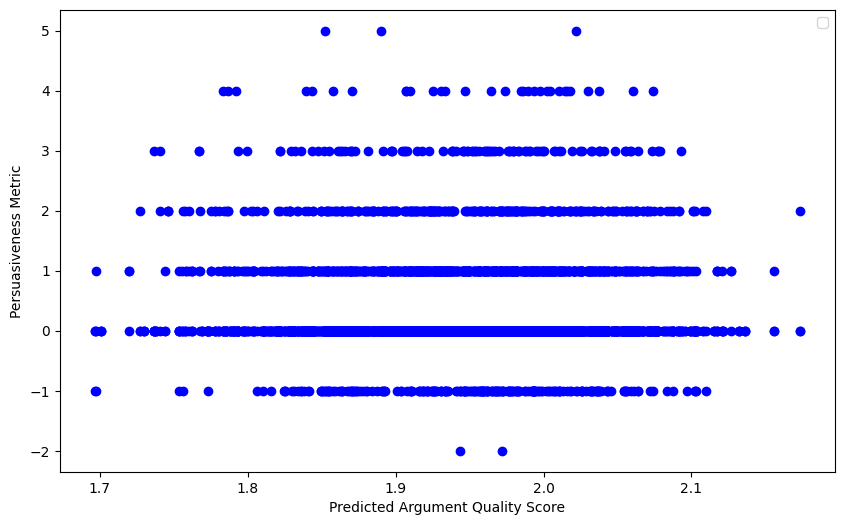

In [17]:
# Define X and y
X = df[['predicted_score']]  # Independent variable
y = df['persuasiveness_metric']  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
#plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Predicted Argument Quality Score')
plt.ylabel('Persuasiveness Metric')
#plt.title('Linear Regression')
plt.legend()
plt.show()

In [15]:
# Define X and y
X = df[['predicted_score']]  # Independent variable
y = df['persuasiveness_metric']  # Dependent variable (should be discrete)

# Create and fit the model
model = LogisticRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)
#for i in y_pred:
#    print(i)

# Evaluation metrics
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting (for binary classification)
if len(y.unique()) == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual values')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Logistic Regression line')
    plt.xlabel('Predicted Score')
    plt.ylabel('Persuasiveness Metric')
    plt.title('Logistic Regression')
    plt.legend()
    plt.show()

Accuracy: 0.6148768723026149
Confusion Matrix:
[[   0    0    2    0    0    0    0    0]
 [   0    0  240    0    0    0    0    0]
 [   0    0 2422    0    0    0    0    0]
 [   0    0  834    0    0    0    0    0]
 [   0    0  307    0    0    0    0    0]
 [   0    0  100    0    0    0    0    0]
 [   0    0   31    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         2
          -1       0.00      0.00      0.00       240
           0       0.61      1.00      0.76      2422
           1       0.00      0.00      0.00       834
           2       0.00      0.00      0.00       307
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00         3

    accuracy                           0.61      3939
   macro avg       0.08      0.12      0.10

# Run regression between our annotated arg qual and persuasiveness

In [4]:
# Create averaged annotations

amber = pd.read_csv("Data/Annotations/Argument quality annotation Amber.csv")
max = pd.read_csv("Data/Annotations/Argument quality annotation Max.csv")
lesley = pd.read_csv("Data/Annotations/Argument quality annotation Lesley.csv")
dimitra = pd.read_csv("Data/Annotations/Argument quality annotation Dimitra.csv")

merged_df = pd.concat([max, amber, dimitra, lesley])

# Group by 'claim' and 'argument' and calculate the mean for the specified columns
result_df = merged_df.groupby(['claim', 'argument'], as_index=False).agg({
    'cogency': 'mean',
    'effectiveness': 'mean',
    'reasonableness': 'mean',
    'overall': 'mean'
})

# Print the resulting dataframe to verify
result_df.head()
#result_df.to_csv("Data/Annotations/Argument quality annotation Average.csv")

Mean Squared Error (MSE): 0.5945060872245337
R-squared (R2 ): 0.0019426715545302065


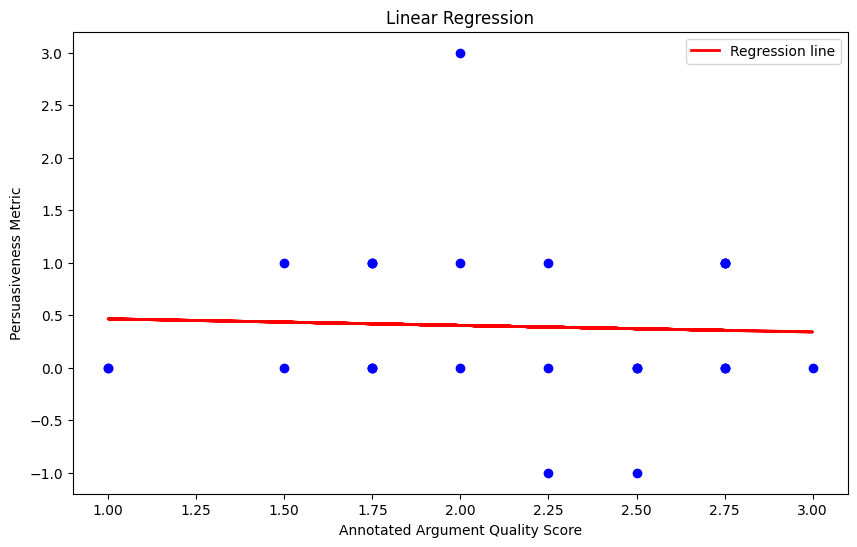

In [23]:
annotations = pd.read_csv("Data/Annotations/Argument quality annotation Average.csv")

# Define X and y
X = annotations[['overall']]  # Independent variable
y = annotations['persuasiveness_metric']  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Annotated Argument Quality Score')
plt.ylabel('Persuasiveness Metric')
plt.title('Linear Regression')
plt.legend()
plt.show()